In this notebook, we will apply various machine learning algorithms for sentiment analysis on tweets and store the model with the highest accuracy.

## Downloading Dataset

In [32]:
!curl -L -o '/content/twitter-entity-sentiment-analysis.zip' 'https://www.kaggle.com/api/v1/datasets/download/jp797498e/twitter-entity-sentiment-analysis'

# Unzip the dataset
!unzip '/content/twitter-entity-sentiment-analysis.zip' -d /content/

# Clean up
!rm -rf '/content/twitter-entity-sentiment-analysis.zip' '/content/twitter_validation.csv'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2041k  100 2041k    0     0  4033k      0 --:--:-- --:--:-- --:--:-- 4033k
Archive:  /content/twitter-entity-sentiment-analysis.zip
  inflating: /content/twitter_training.csv  
  inflating: /content/twitter_validation.csv  


##EDA

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('/content/twitter_training.csv', header=None)

In [35]:
df.shape

(74682, 4)

In [36]:
df.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [37]:
df = df[[2,3]].reset_index(drop=True)

In [38]:
df.columns = ['sentiment', 'text']

In [39]:
df.head(5)

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  74682 non-null  object
 1   text       73996 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [41]:
df.isnull().sum()
df.dropna(inplace=True)

In [42]:
sum(df['text'].apply(len)>5), sum(df['text'].apply(len)<=5)

(71890, 2106)

In [43]:
print(df.shape)
#keeping the text which length greater than 5
df =df[df['text'].apply(len)>5]
print(df.shape)

(73996, 2)
(71890, 2)


In [44]:
df.sample(10)

,sentiment,text
61683,Positive,This Grand Theft Auto Diorama Will Crush Your ...
47300,Positive,See you tomorrow morning at the Home Depot
47614,Negative,"You were right, he also deserved it."
74491,Negative,@ BlizzardCSEU _ EN... Can you play Wow Classi...
46110,Negative,Hey @verizonfios @verizon @VerizonSupport Why ...
27441,Negative,Assassin's creed syndicate probably the worst ...
22107,Irrelevant,s1mple blog
20921,Positive,I find it amusing that everyone credits TTT fo...
8331,Negative,Give the men nice butts hips.
64250,Negative,@ EAMaddenNFL @ EASPORTS EA has the worst cust...


In [45]:
df['sentiment'].value_counts()

,count
sentiment,
Negative,21758
Positive,19912
Neutral,17614
Irrelevant,12606


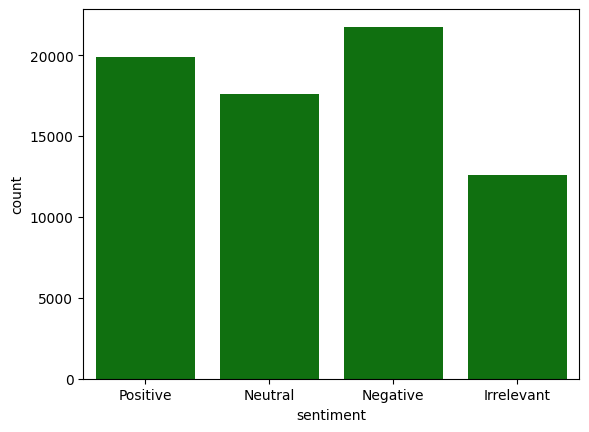

In [46]:
#ploting countplot for sentiment  column
sns.countplot(data=df, x='sentiment', color='green')
plt.show()

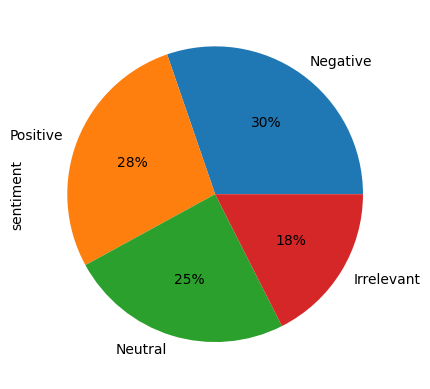

In [47]:
#ploting pie for sentiment  column
df['sentiment'].value_counts().plot(kind='pie',autopct="%1.0f%%")
plt.ylabel("sentiment")
plt.show()

In [48]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

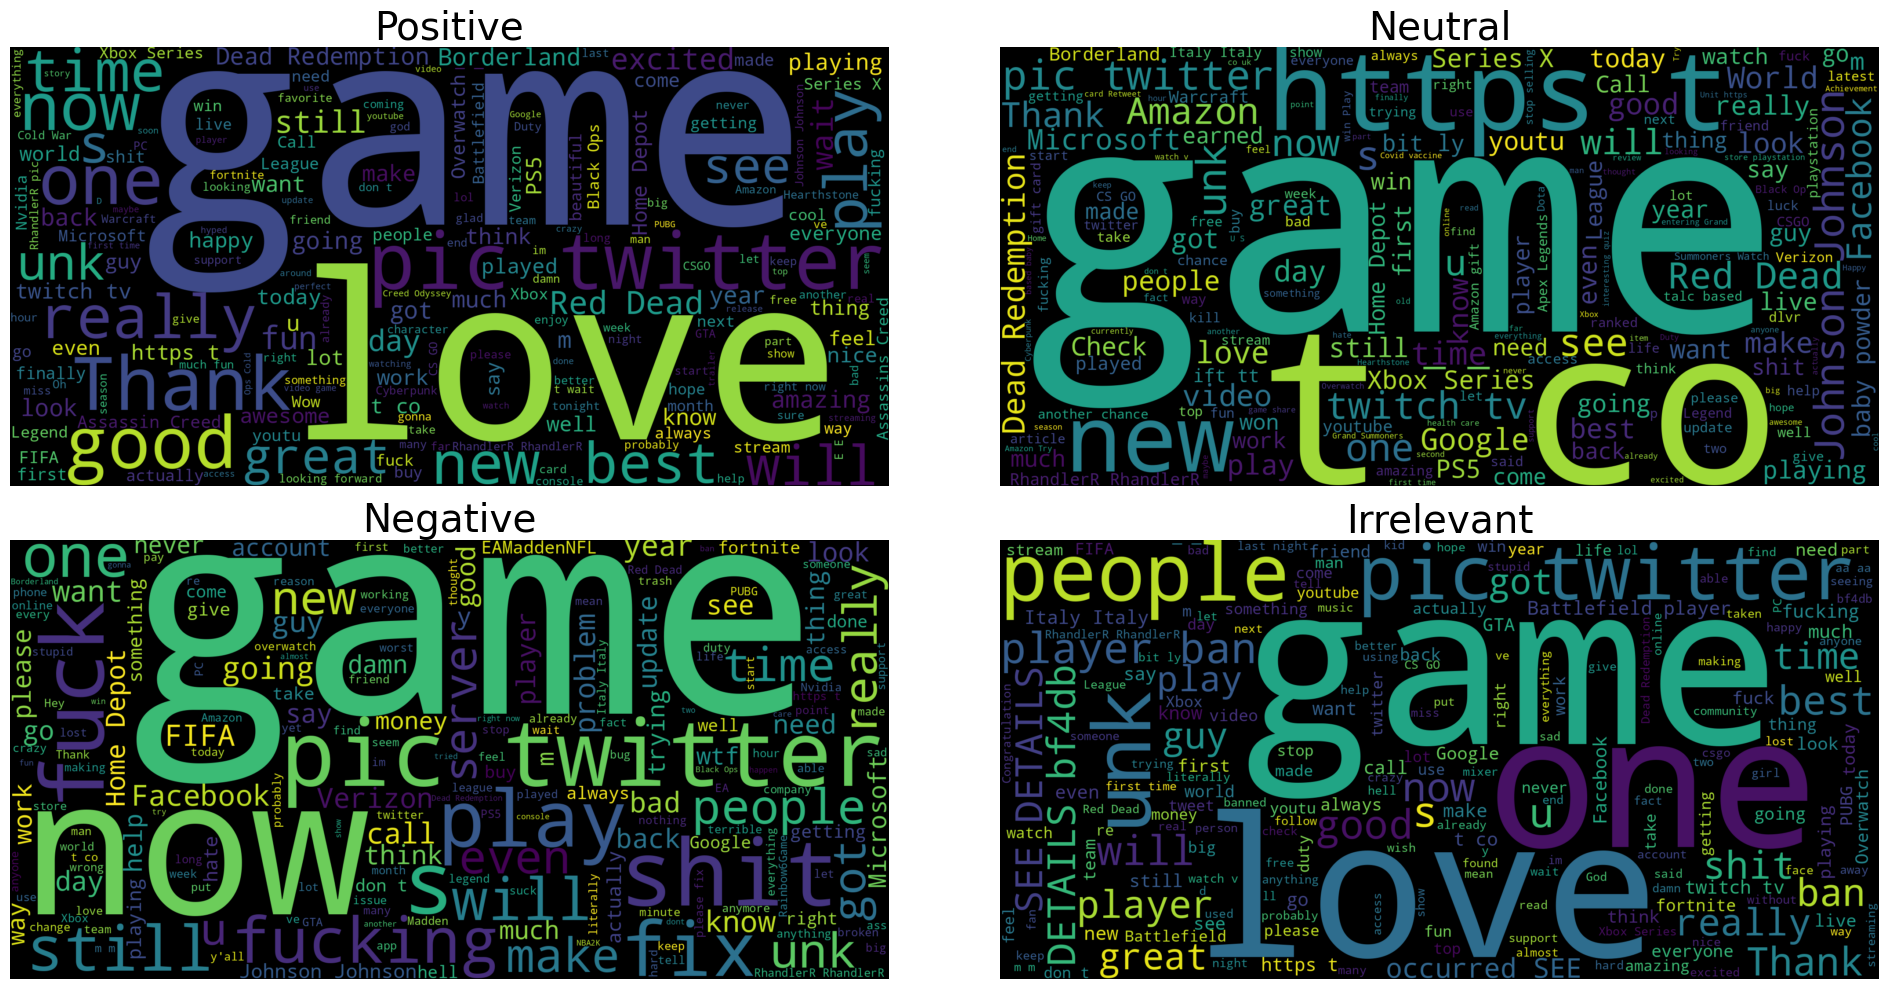

In [49]:
plt.figure(figsize=(20, 10))

for index, sent in enumerate(df['sentiment'].unique()):
    plt.subplot(2, 2, index + 1)
    data = df[df['sentiment'] == sent]['text']
    words = ' '.join(data.astype(str))
    cleaned_words = ' '.join(word for word in words.split() if not word.startswith('@'))
    wordcloud = WordCloud(background_color='black', stopwords=STOPWORDS, width=2000, height=1000).generate(cleaned_words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(sent, fontsize=28)
plt.tight_layout()
plt.show()


##Data Cleaning

In [50]:
import re
import string

def clean_text(text):

    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text=re.sub(r"http\S+|www\.\S+|https\S+",'', text)

    # Remove user mentions (@username) and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # #Remove retweet
    text= re.sub(r'\bRT @\w+','',text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    #Remove special character
    text = re.sub(r'[^\w\s]','',text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text


In [51]:
X = []
sentences = list(df['text'])
for sen in sentences:
    X.append(clean_text(sen))

##Model Building and Testing

In [55]:
#train test split

from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split( X, df['sentiment'], test_size=0.2, random_state=28)

In [61]:
import sklearn

In [56]:
#importing Algorithm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import joblib  # To save the best model

In [57]:
# List of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
}

In [58]:
# Store results
results = []
best_model = None
best_accuracy = 0.0

for name, model in classifiers.items():
    print(f"--- {name} ---")
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)

    # Store model name and accuracy in results
    results.append({
        "Model": name,
        "Accuracy": accuracy
    })

    # Update best model if accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Convert results to a DataFrame
results_df = pd.DataFrame(results)
results_df.to_csv('accuracy_results.csv', index=False)

# Save the best model to a file
joblib.dump(best_model, 'twitter_sentiment_analysis.pkl')

print("\nSummary of Results:")
print(results_df.sort_values(by="Accuracy", ascending=False))
print(f"\nBest Model: {results_df.loc[results_df['Accuracy'].idxmax(), 'Model']} with Accuracy: {best_accuracy}")

--- Logistic Regression ---


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7619279454722493
--- K-Nearest Neighbors ---
0.8742523299485325
--- Support Vector Machine ---
0.9280150229517318
--- Decision Tree ---
0.7398803727917652
--- Random Forest ---
0.9163305049380999
--- AdaBoost ---


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.4620253164556962
--- Gradient Boosting ---
0.536653220197524

Summary of Results:
                    Model  Accuracy
2  Support Vector Machine  0.928015
4           Random Forest  0.916331
1     K-Nearest Neighbors  0.874252
0     Logistic Regression  0.761928
3           Decision Tree  0.739880
6       Gradient Boosting  0.536653
5                AdaBoost  0.462025

Best Model: Support Vector Machine with Accuracy: 0.9280150229517318


## Loading the model and validating on data

In [59]:
model = joblib.load('twitter_sentiment_analysis.pkl')

In [60]:
# Example usage of the  twitter sentiment analysis model
data = ["This product is amazing!", "Worst purchase ever","he goes to gym"]
predictions = model.predict(data)
print(predictions)

['Positive' 'Negative' 'Irrelevant']
